In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
observations = 1000 

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs -3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs, targets=generated_targets )


### solving with tensorflow

In [12]:
input_size=2
output_size=1

### outline the model

In [16]:
inputs = tf.placeholder(tf.float32,[None,input_size])
targets = tf.placeholder(tf.float32,[None,output_size])

weights = tf.Variable(tf.random_uniform([input_size,output_size],minval=-0.1,maxval = 0.1))
biases = tf.Variable(tf.random_uniform([output_size],minval=-0.1,maxval=0.1))

outputs = tf.matmul(inputs,weights) + biases

### choosing the objective function and the optimization method 

In [17]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### prepare for execution

In [21]:
sess = tf.InteractiveSession()

### initializing

In [23]:
initializer = tf.global_variables_initializer()
    
sess.run(initializer)

### loading training data 

In [24]:
training_data = np.load('TF_intro.npz')

### Learning

In [26]:
for e in range(100):
    
    _, curr_loss = sess.run([optimize, mean_loss],
                           feed_dict={inputs: training_data['inputs'],targets: training_data['targets']})
    
    print (curr_loss)

213.66707
88.243286
40.340656
21.267052
13.216577
9.516722
7.600223
6.4515343
5.657047
5.042797
4.5326858
4.0915823
3.7019532
3.3540597
3.0417492
2.760628
2.5072455
2.2787154
2.072528
1.886471
1.7185656
1.5670335
1.4302764
1.306851
1.1954584
1.0949248
1.004191
0.92230284
0.84839696
0.7816958
0.7214969
0.66716594
0.61813104
0.5738763
0.5339361
0.49788865
0.46535534
0.43599385
0.40949425
0.38557816
0.36399287
0.34451208
0.32693028
0.31106263
0.29674137
0.2838166
0.27215177
0.2616239
0.2521223
0.24354672
0.23580733
0.22882228
0.22251832
0.21682861
0.21169372
0.20705935
0.20287684
0.1991019
0.19569504
0.19262025
0.18984513
0.18734059
0.18508017
0.18304017
0.181199
0.17953731
0.1780376
0.17668405
0.17546244
0.17435998
0.17336494
0.17246692
0.17165646
0.17092502
0.17026483
0.16966906
0.16913125
0.168646
0.168208
0.16781273
0.1674559
0.16713397
0.16684332
0.16658108
0.16634426
0.16613068
0.16593784
0.16576385
0.16560678
0.16546507
0.16533716
0.16522166
0.16511749
0.16502346
0.1649386
0.164861

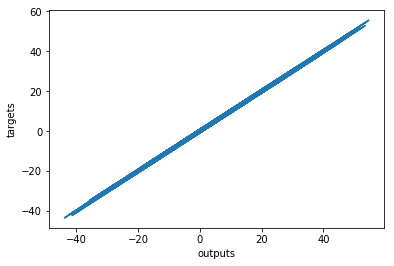

In [27]:
out = sess.run([outputs],
              feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()